##### Good morning to all



##### Random Forest Algorithm
- both classification and regression
- overcomes overfitting
- gives high accuracy when compared to other algorithm
- it works better if dataset has missing values also
- less time for computing

In [2]:
import pandas as pd
df=pd.read_csv("birds.csv")
df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [3]:
df["type"].unique()

array(['SW', 'W', 'T', 'R', 'P', 'SO'], dtype=object)

In [4]:
df.isna().sum()

id       0
huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

In [5]:
import numpy as np
df=df.replace(np.nan,0.0)
df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [6]:
df.isna().sum()

id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["type"]=le.fit_transform(df["type"])
df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,3
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,3
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,3
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,3
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,3


In [10]:
df["type"].unique()

array([3, 5, 4, 1, 0, 2], dtype=int64)

In [13]:
x=df.iloc[:,1:11]
y=df["type"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_predict=model.predict(x_test)
y_predict

array([5, 2, 5, 2, 2, 5, 5, 5, 1, 5, 3, 3, 2, 3, 2, 2, 1, 1, 4, 0, 4, 1,
       2, 1, 2, 2, 3, 2, 0, 3, 2, 5, 1, 4, 2, 4, 1, 3, 0, 0, 3, 3])

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.8333333333333334
[[ 2  0  0  0  0  0]
 [ 1  5  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  2  1  8  0  2]
 [ 0  0  0  0  4  0]
 [ 1  0  0  0  0  5]]


#### Random Forest Regression 



In [68]:
df=pd.read_csv("automobiles.csv")
df.head(2)

,make,fuel-type,num-of-doors,body-style,engine-location,length,width,height,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,two,convertible,front,168.8,64.1,48.8,four,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,front,168.8,64.1,48.8,four,111,5000,21,27,16500


In [69]:
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["make"]=le.fit_transform(df["make"])
df["fuel-type"]=le.fit_transform(df["fuel-type"])
df["num-of-doors"]=le.fit_transform(df["num-of-doors"])
df["body-style"]=le.fit_transform(df["body-style"])
df["engine-location"]=le.fit_transform(df["engine-location"])
df["num-of-cylinders"]=le.fit_transform(df["num-of-cylinders"])

In [71]:
df.isna().sum()

make                0
fuel-type           0
num-of-doors        0
body-style          0
engine-location     0
length              0
width               0
height              0
num-of-cylinders    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

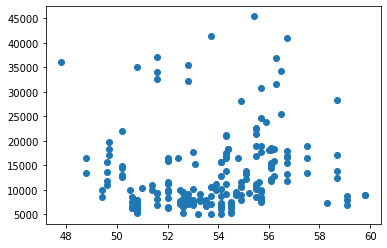

In [72]:
import matplotlib.pyplot as plt
x1=df["height"]
y1=df["price"]
plt.scatter(x1,y1)
plt.show()

In [73]:
x=df.iloc[:,0:9]
y=df["price"]

In [50]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x,y)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [51]:
from sklearn.metrics import r2_score
model.score(x,y)

0.9642633329224576

In [74]:
df=df.replace('?','121')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 14 columns):
make                201 non-null int64
fuel-type           201 non-null int64
num-of-doors        201 non-null int64
body-style          201 non-null int64
engine-location     201 non-null int64
length              201 non-null float64
width               201 non-null float64
height              201 non-null float64
num-of-cylinders    201 non-null int64
horsepower          201 non-null object
peak-rpm            201 non-null object
city-mpg            201 non-null int64
highway-mpg         201 non-null int64
price               201 non-null int64
dtypes: float64(3), int64(9), object(2)
memory usage: 22.1+ KB


In [77]:
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', '73', '82', '94', '62', '56', '112', '92',
       '161', '156', '52', '85', '114', '162', '134', '106'], dtype=object)

In [78]:
df["peak-rpm"].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '121', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [80]:
df["horsepower"]=le.fit_transform(df["horsepower"])
df["peak-rpm"]=le.fit_transform(df["peak-rpm"])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 14 columns):
make                201 non-null int64
fuel-type           201 non-null int64
num-of-doors        201 non-null int64
body-style          201 non-null int64
engine-location     201 non-null int64
length              201 non-null float64
width               201 non-null float64
height              201 non-null float64
num-of-cylinders    201 non-null int64
horsepower          201 non-null int64
peak-rpm            201 non-null int32
city-mpg            201 non-null int64
highway-mpg         201 non-null int64
price               201 non-null int64
dtypes: float64(3), int32(1), int64(10)
memory usage: 21.3 KB


In [83]:
x=df.iloc[:,0:12]
y=df["price"]
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x,y)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [84]:
from sklearn.metrics import r2_score
model.score(x,y)

0.9751193564969033

***try to apply diabetes dataset to any of the classification algorithms***